<img src='./images/indian-dishes.jpg'></img>

Indian Cuisine consists of a variety of regional and traditional cuisines native to the Indian Subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, cultural choices and traditions. Historical events such as invasions, trade relations, and 
colonialism have played a role in introducing certain foods to this country.

This notebook comprises of some interesting facts and observations that people might not know about Indian cuisine.

### Table of Contents:
* [Proportion of Vegetarian and Non-Vegetarian dishes](#prop_veg_nonveg)
* [Number of dishes based on regions](#region_based_dishes)
* [State-wise Distribution of Indian Sweets](#state_based_indian_sweets)
* [Number of dishes based on courses of meal](#dishes_per_courses)
* [Proportion of Flavor Profiles](#prop_flavor_profile)
* [Ingredients used in Indian desserts](#ingredients_indian_desserts)
* [Ingredients used in South-Indian cuisine](#ingredients_south_indian_dish)
* [Ingredient used in North-Indian cuisine](#ingredient_north_indian_dish)
* [List of Indian dishes that are sweet in flavor but not desserts](#sweet_indian_dishes)
* [Overall Ingredients used in Indian cuisine](#overall_ingredients_indian_cuisine)
* [Comparing preparation time and cooking time for Veg and Non Veg dishes](#compare_preparation_time)
* [Maharashtra Food - Mini Infograph](#maharashtra_food)
* [Ingredients used in Vegetarian food](#ingredients_veg_dish)
* [Ingredients used in Non Vegetarian food](#ingredients_nonveg_dish)
* [Top 10 snacks with shortest cooking time](#top_10_shortest_cooking_dishes)
* [Top 10 snacks with longest cooking time]((#top_10_longest_cooking_dishes))
* [Top 10 main courses with shortest cooking time](#top_10_shortest_main_courses)
* [Top 10 main courses with longest cooking time](#top_10_longest_main_courses)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [2]:
cuisine_data = pd.read_csv('Datasets/Cuisine-Similarity-Analysis/indian_food.csv')
cuisine_data = cuisine_data.replace(-1, np.NaN)
cuisine_data = cuisine_data.replace('-1', np.NaN)
cuisine_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [3]:
cuisine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    object 
 1   ingredients     255 non-null    object 
 2   diet            255 non-null    object 
 3   prep_time       225 non-null    float64
 4   cook_time       227 non-null    float64
 5   flavor_profile  226 non-null    object 
 6   course          255 non-null    object 
 7   state           231 non-null    object 
 8   region          241 non-null    object 
dtypes: float64(2), object(7)
memory usage: 18.1+ KB


<a id='prop_veg_nonveg'></a>
### Proportion of Vegetarian and Non-Vegetarian dishes

In [4]:
pie_df = cuisine_data['diet'].value_counts().reset_index()
pie_df.columns = ['diet', 'count']
fig = px.pie(pie_df, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
            color_discrete_sequence=['green', 'red'])
fig.show()

#### Observation:
    Vegetarian dishes are more than non-vegetarian dishes
    
#### Fun-Fact:
    India is ranked top in the world with 38% of the total population being vegetarians

<a id='region_based_dishes'></a>
### Number of dishes based on regions

In [5]:
reg_df = cuisine_data['region'].value_counts().reset_index()
reg_df.columns = ['region', 'count']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df, x='region', y='count', title='Number of dishes based on regions')
fig.show()

<a id='state_based_indian_sweets'></a>
### State-wise Distribution of Indian Sweets

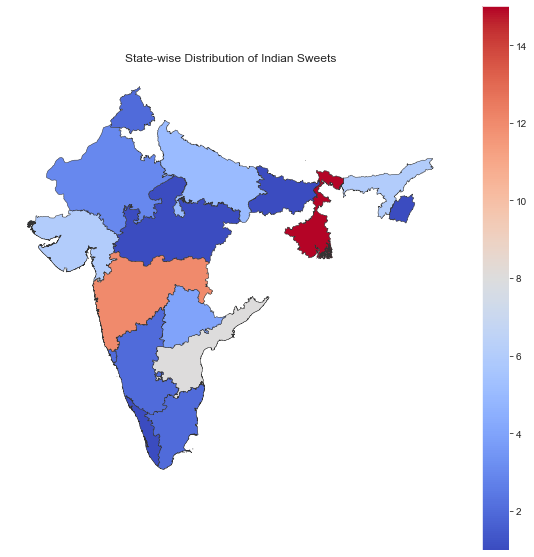

In [6]:
shp_gdf = gpd.read_file('./GIS-Maps/IND_adm1.shp')
desserts = cuisine_data[cuisine_data['course']=='dessert']
des_df = desserts['state'].value_counts().reset_index()
des_df.columns = ['state', 'count']
merged = shp_gdf.set_index('NAME_1').join(des_df.set_index('state'))
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Sweets')
fig = merged.plot(column='count', cmap='coolwarm', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
plt.show()

#### Observation:
    Most number of famous sweets are available in the state of West Bengal

<a id='dishes_per_courses'></a>
### Number of dishes based on courses of meal

In [7]:
courses_df = cuisine_data['course'].value_counts().reset_index()
courses_df.columns = ['course', 'count']
courses_df = courses_df.sample(frac=1)
fig = px.bar(courses_df, x='course', y='count', title='Number of dishes based on courses of meal', 
             color_discrete_sequence=['#db79f6'])
fig.show()

<a id='prop_flavor_profile'></a>
### Proportion of Flavor Profiles

In [8]:
flavor_df = cuisine_data['flavor_profile'].value_counts().reset_index()
flavor_df.columns = ['flavor', 'count']
fig = px.pie(flavor_df, values='count', names='flavor', title='Proportion of Flavor Profiles',
            color_discrete_sequence=['#FF7F0E', '#00B5F7','#AB63FA','#00CC96'])
fig.show()

#### Observations:
    More than 50% of the dishes are spicy
    
#### Fun-Fact:
   India is the **largest** producer of spices in the world. No country in the world produces as many varieties of spices as India.

   According to Ayurveda, Indian food is a balance of 6 flavors: **sweet, sour, salty, bitter, spicy, and astringent.** 
   Each flavor is imparted from a particular ingredient in a dish. This is the uniqueness of Indian cuisine!

<a id='ingredients_indian_desserts'></a>
### Ingredients used in Indian desserts

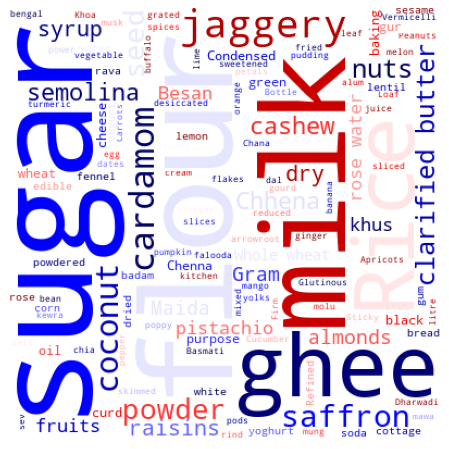

In [9]:
dessert_df = cuisine_data[cuisine_data['course']=='dessert'].reset_index()
ingredients = []
for i in range(0, len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
text = ' '.join(ingredients)
wordcloud = WordCloud(width=400, height=400, colormap='seismic', background_color='white', min_font_size=8).generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation:
   Commonly used ingredients for making indian desserts are **Sugar, Ghee, Milk and Rice**

<a id='ingredients_south_indian_dish'></a>
### Ingredients used in South-Indian cuisine

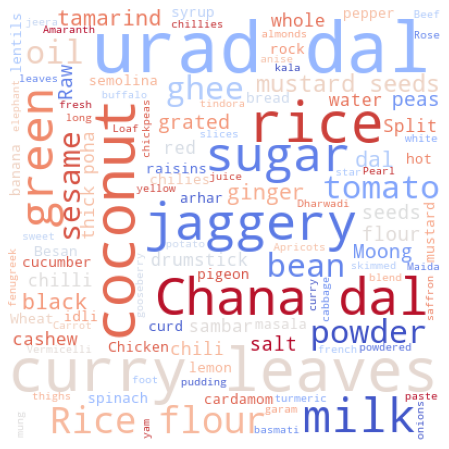

In [10]:
south_dishes_df = cuisine_data[cuisine_data['region']=='South'].reset_index()
ingredients = []
for i in range(0, len(south_dishes_df)):
    text = south_dishes_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
text = ' '.join(ingredients)
wordcloud = WordCloud(width=400, height=400, colormap='coolwarm', background_color='white', min_font_size=8).generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation:
Commonly used ingredients for south indian dishes are **Curry leaves, urad dal, chana dal and coconut**.

<a id='ingredient_north_indian_dish'></a>
### Ingredient used in North-Indian cuisine

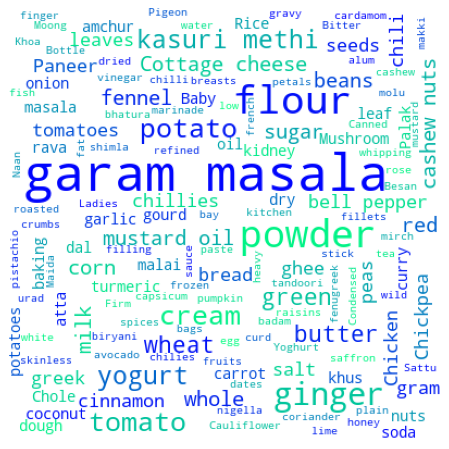

In [11]:
north_dishes_df = cuisine_data[cuisine_data['region']=='North'].reset_index()
ingredients = []
for i in range(0, len(north_dishes_df)):
    text = north_dishes_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
text = ' '.join(ingredients)
wordcloud = WordCloud(width=400, height=400, colormap='winter', background_color='white', 
                      min_font_size=8).generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation:
Commonly used ingredients for north indian dishes are **Garam Masala, ginger, potato**

<a id='sweet_indian_dishes'></a>
### List of Indian dishes that are sweet in flavor but not desserts

In [12]:
sweet_dishes_df = cuisine_data[(cuisine_data['flavor_profile']=='sweet') & (cuisine_data['course']!='dessert')]
sweet_dishes_df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


<a id='overall_ingredients_indian_cuisine'></a>
### Overall Ingredients used in Indian cuisine

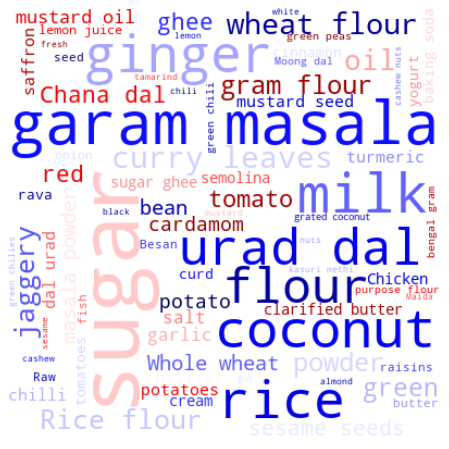

In [13]:
ingredients = []
for i in range(0, len(cuisine_data)):
    text = cuisine_data['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
text = ' '.join(ingredients)
wordcloud = WordCloud(width=400, height=400, colormap='seismic', background_color='white', 
                      min_font_size=8).generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<a id='compare_preparation_time'></a>
### Comparing preparation time and cooking time for Veg and Non Veg dishes

In [14]:
fig = px.scatter(cuisine_data, x='cook_time', y='prep_time', color='diet', 
                 color_discrete_sequence=['green', 'red'], hover_data=['name'], 
                 labels={
                     'cook_time': 'Cooking Time(minutes)',
                     'prep_time': 'Preparion Time(minutes)'
                 })
fig.show()

#### Observation:
* Most of the veg and non-veg dishes have preparation time and cooking time between **0 to 100** minutes.
* **Shrikhand** which is a traditional **Maharashtian** sweet has cooking time of **720 minutes** mainly because the sweet has to be kept in the refrigerator for it to set.
* **Pindi Chana** is a famous main course item in the North India which takes **500 minutes** to prepare. The reason behind this is that the Chana needs to be soaked for about 7-8 hours.

<a id='maharashtra_food'></a>
### Maharashtra Food - Mini Infograph

In [15]:
mah_df = cuisine_data[cuisine_data['state']=='Maharashtra']
total_dishes = mah_df.shape[0]

courses_mah_df = mah_df['course'].value_counts().reset_index()
courses_mah_df.columns = ['course', 'num']

diet_mah_df = mah_df['diet'].value_counts().reset_index()
diet_mah_df.columns = ['diet', 'num']

fig = make_subplots(rows=2, cols=2, subplot_titles=['Total Dishes', 'Dishes By Courses', '', ''],
                   specs=[[{'type': 'indicator'}, {'type': 'bar', 'rowspan': 2}],
                          [{'type': 'pie'}, {'type': 'pie'}]])

fig.add_trace(go.Indicator(
    mode='number',
    value=int(total_dishes),
    number={'font': {'color': 'blue', 'size': 50}}), row=1, col=1)

fig.add_trace(go.Bar(
    x=courses_mah_df['course'],
    y=courses_mah_df['num'],
    marker={'color': 'orange'},
    text=courses_mah_df['num'],
    name='Courses By Dishes',
    textposition='auto'), row=1, col=2)

fig.add_trace(go.Pie(
    labels=diet_mah_df['diet'],
    values=diet_mah_df['num'],
    textinfo='percent',
    marker={'colors': ['green', 'red']}), row=2, col=1)

fig.update_layout(title_text='Maharashtra Food - Mini Infograph', template='plotly',
                  title_x=0.5)

fig.show()

<a id='bengali_food'></a>
### Bengal Food - Mini Infograph

In [16]:
bengal_df = cuisine_data[cuisine_data['state']=='West Bengal']
total_dishes = bengal_df.shape[0]

courses_bengal_df = bengal_df['course'].value_counts().reset_index()
courses_bengal_df.columns = ['course', 'num']

diet_bengal_df = bengal_df['diet'].value_counts().reset_index()
diet_bengal_df.columns = ['diet', 'num']

fig = make_subplots(rows=2, cols=2, subplot_titles=['Total Dishes', 'Dishes By Courses', '', ''],
                   specs=[[{'type': 'indicator'}, {'type': 'bar', 'rowspan': 2}],
                          [{'type': 'pie'}, {'type': 'pie'}]])

fig.add_trace(go.Indicator(
    mode='number',
    value=int(total_dishes),
    number={'font': {'color': 'blue', 'size': 50}}), row=1, col=1)

fig.add_trace(go.Bar(
    x=courses_bengal_df['course'],
    y=courses_bengal_df['num'],
    marker={'color': 'orange'},
    text=courses_bengal_df['num'],
    name='Courses By Dishes',
    textposition='auto'), row=1, col=2)

fig.add_trace(go.Pie(
    labels=diet_bengal_df['diet'],
    values=diet_bengal_df['num'],
    textinfo='percent',
    marker={'colors': ['green', 'red']}), row=2, col=1)

fig.update_layout(title_text='Bengal Food - Mini Infograph', template='plotly',
                  title_x=0.5)

fig.show()

<a id='ingredients_veg_dish'></a>
### Ingredients used in Vegetarian food

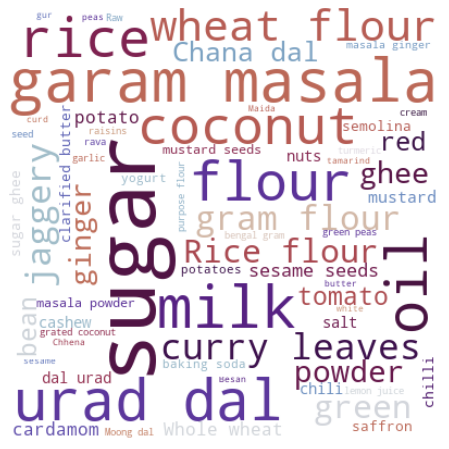

In [17]:
veg_dishes_df = cuisine_data[cuisine_data['diet']=='vegetarian'].reset_index()
ingredients = []
for i in range(0, len(veg_dishes_df)):
    text = veg_dishes_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
text = ' '.join(ingredients)
wordcloud = WordCloud(width=400, height=400, colormap='twilight', background_color='white', min_font_size=8).generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Observation:
Commonly used ingredients for vegetarian dishes are **Garam masala, Rice, Sugar, curry leaves and urad dal**.

<a id='ingredients_nonveg_dish'></a>
### Ingredients used in Non Vegetarian food

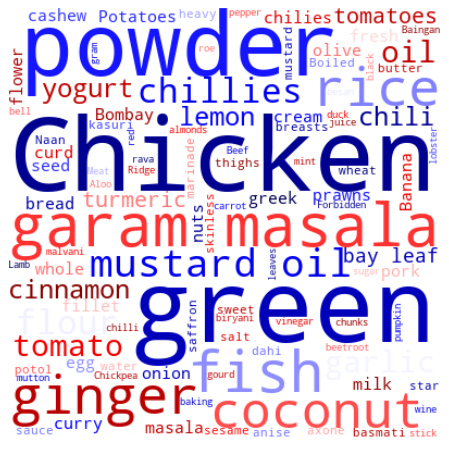

In [18]:
nonveg_dishes_df = cuisine_data[cuisine_data['diet']=='non vegetarian'].reset_index()
ingredients = []
for i in range(0, len(nonveg_dishes_df)):
    text = nonveg_dishes_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
text = ' '.join(ingredients)
wordcloud = WordCloud(width=400, height=400, colormap='seismic', background_color='white', min_font_size=8).generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Observation:
Most commonly used ingredients in non-veg dishes are **Chicken, garam masala, mastard oil, chillies and ginger**.

<a id='top_10_shortest_cooking_dishes'></a>
### Top 10 Snacks with Shortest Cooking Time

In [21]:
snaks_df = cuisine_data[cuisine_data['course']=='snack']
short_sort_snack_df = snaks_df.sort_values(['cook_time'], ascending=True).iloc[:10, :]

fig = px.bar(short_sort_snack_df, x='cook_time', y='name', orientation='h', color='cook_time',
            labels={'name': 'Name of Snack', 'cook_time': 'Cooking Time (Minutes)'})
fig.show()

<a id='top_10_longest_cooking_dishes'></a>
### Top 10 Snacks with Longest Cooking Time

In [29]:
snaks_df = cuisine_data[cuisine_data['course']=='snack']
long_sort_snack_df = snaks_df.sort_values(['cook_time'], ascending=False).iloc[:10, :]

fig = px.bar(long_sort_snack_df, x='cook_time', y='name', orientation='h', color='cook_time',
            labels={'name': 'Name of Snack', 'cook_time': 'Cooking Time (Minutes)'})
fig.show()

<a id='top_10_shortest_main_courses'></a>
### Top 10 Main Courses with Shortest Cooking Time

In [30]:
main_course_df = cuisine_data[cuisine_data['course']=='main course']
short_sort_main_df = main_course_df.sort_values(['cook_time'], ascending=True).iloc[:10, :]

fig = px.bar(short_sort_main_df, x='cook_time', y='name', orientation='h', color='cook_time',
            labels={'name': 'Name of Main Course', 'cook_time': 'Cooking Time (Minutes)'})
fig.show()

<a id='top_10_longest_main_courses'></a>
### Top 10 Main Courses with Longest Cooking Time

In [31]:
long_sort_main_df = main_course_df.sort_values(['cook_time'], ascending=False).iloc[:10, :]

fig = px.bar(long_sort_main_df, x='cook_time', y='name', orientation='h', color='cook_time',
            labels={'name': 'Name of Main Course', 'cook_time': 'Cooking Time (Minutes)'})
fig.show()